In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
start = '2010-01-01'
end = '2024-04-21'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [16]:
print(df.shape)
print(df.size)

(3598, 6)
21588


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100


In [18]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


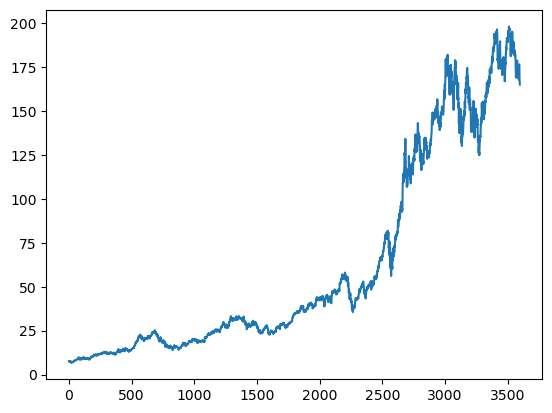

In [19]:
plt.plot(df.Close)

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
...,...,...,...,...,...,...,...
3593,2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
3594,2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
3595,2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
3596,2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900


In [31]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3593    183.7780
3594    183.5573
3595    183.3309
3596    183.0882
3597    182.8385
Name: Close, Length: 3598, dtype: float64

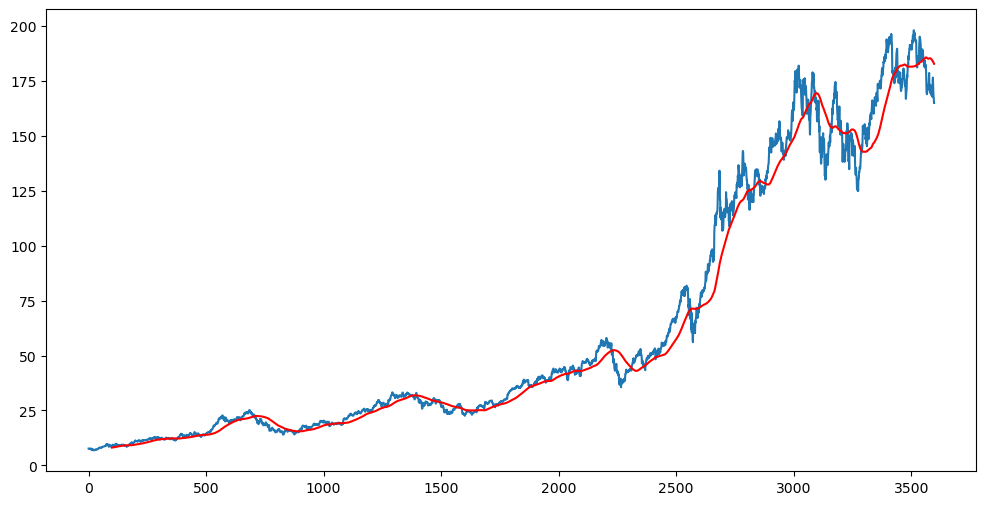

In [32]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [33]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3593    182.68935
3594    182.58830
3595    182.45845
3596    182.33135
3597    182.19970
Name: Close, Length: 3598, dtype: float64

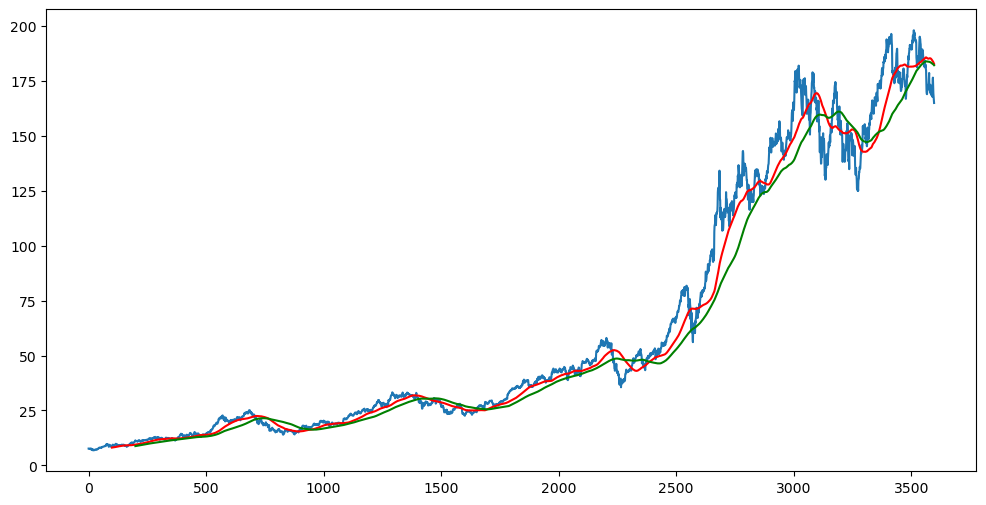

In [34]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [35]:
df.shape

(3598, 7)

In [36]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2518, 1)
(1080, 1)


In [18]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [19]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [22]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(1660, 100, 1)

In [24]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add (Dropout(0.2))

model.add (LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add (Dropout(0.3))

model.add (LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add (Dropout(0.4))

model.add (LSTM(units = 120, activation = 'relu'))
model.add (Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\muham\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - loss: 0.1314
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0137
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0123
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0096
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0102
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.0086
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0079
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0078
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 0.0078
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0078
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0071
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0071
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0074
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 0.0073
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - 

In [46]:
model.save('keras.h5')

In [30]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [31]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [34]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [36]:
input_data.shape

(855, 1)

In [37]:
x_test=[]
y_test=[]

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [39]:
#making prediction
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


In [40]:
y_predicted.shape

(755, 1)

In [41]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [42]:
y_predicted

array([[0.16573504],
       [0.16635843],
       [0.16694804],
       [0.16748749],
       [0.1679641 ],
       [0.16837198],
       [0.16871877],
       [0.16902652],
       [0.16932043],
       [0.16962782],
       [0.16996555],
       [0.17033862],
       [0.17075422],
       [0.17121643],
       [0.17172143],
       [0.17226279],
       [0.17283194],
       [0.17341733],
       [0.17402612],
       [0.17467001],
       [0.1753565 ],
       [0.1760834 ],
       [0.17683865],
       [0.1776908 ],
       [0.1787188 ],
       [0.17998582],
       [0.18154289],
       [0.18342763],
       [0.18565589],
       [0.18821934],
       [0.19108036],
       [0.19415015],
       [0.19735733],
       [0.2006916 ],
       [0.20412013],
       [0.207593  ],
       [0.21104975],
       [0.21444528],
       [0.21773341],
       [0.22087196],
       [0.2238285 ],
       [0.2265799 ],
       [0.2291297 ],
       [0.2314778 ],
       [0.2336357 ],
       [0.23561476],
       [0.23742679],
       [0.239

In [43]:
scaler.scale_

array([0.02123255])

In [44]:
scale_factor = 1 / 0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test* scale_factor

    

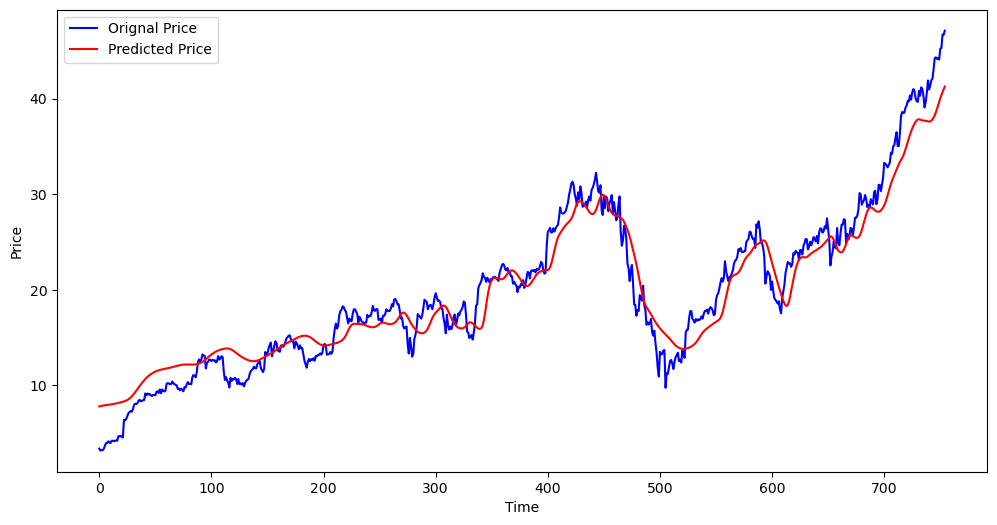

In [45]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()